In [1]:
from pylab import *
import time
import scipy.special

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'text.usetex': True})
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']
plt.rcParams.update({'font.family': 'serif', 
                     'font.serif':['Computer Modern']})


In [3]:
def crvec(N, D=1):
    rphase = 2*np.pi * np.random.rand(int(D), int(N))
    return np.cos(rphase) + 1.0j * np.sin(rphase)

def scvec(N, D, K):
    letter_vectors_c = crvec(N, D)

    for d in range(D):
        ip = np.random.choice(int(N), size=int(N-K), replace=False)
        letter_vectors_c[d, ip] = 0
        
    return letter_vectors_c

def lccvec(N, D, K):
    # N needs to be multiple of K
    
    R = N/K
    
    assert(R==N//K)
    
    letter_vectors_c = 0*crvec(N, D)
    
    for d in range(D):
        ip = np.random.choice(int(R), size=int(K), replace=True)
        
        ip += int(R) * np.arange(int(K))
        
        letter_vectors_c[d, ip] = crvec(K, 1)
        
    return letter_vectors_c
    


In [4]:
def cconv(a, b):
    return ifft(fft(a) * fft(b))
    
def ccinv(a):
    return ifft(np.conj(fft(a)))

In [5]:
def lccbind(vec1, vec2, Kv):
    Nv = vec1.shape[0]
    Rv = Nv/Kv

    vec1r = np.reshape(vec1, [int(Kv), int(Rv)])
    vec2r = np.reshape(vec2, [int(Kv), int(Rv)])

    vec_br = cconv(vec1r, vec2r)

    vec_b = vec_br.flatten()
    
    return vec_b

def lccinv(vec1, Kv):
    Nv = vec1.shape[0]
    Rv = Nv/Kv

    vec1r = np.reshape(vec1, [int(Kv), int(Rv)])
    
    vec1_ir = ccinv(vec1r)
    vec1_i = vec1_ir.flatten()
    
    return vec1_i

# Sparse binding demo -- What's the dollar of mexico?

To demonstrate the binding operation with sparse block code, we replicate the example from Kanerva's What we mean when we say 'What's the dollar of mexico?'

https://pdfs.semanticscholar.org/f477/232c0a0835dcbc4fc6b6283db484695482f9.pdf


In [6]:
N = 2000
K = 100

# Make a vector for each concept

codebook = lccvec(N, 9, K)
labels = 9*['']

NAM = codebook[0]; labels[0] = 'Name'
CAP = codebook[1]; labels[1] = 'Capitol'
MON = codebook[2]; labels[2] = 'Money'

USA = codebook[3]; labels[3] = 'USA'
WDC = codebook[4]; labels[4] = 'Wash. D.C.'
DOL = codebook[5]; labels[5] = 'Dollar'
MEX = codebook[6]; labels[6] = 'Mexico'
MXC = codebook[7]; labels[7] = 'Mex. City'
PES = codebook[8]; labels[8] = 'Peso'



Now we make a vector that represents the united states and mexico

In [7]:
USTATES = lccbind(NAM, USA, K) + lccbind(CAP, WDC, K) + lccbind(MON, DOL, K)
MEXICO = lccbind(NAM, MEX, K) + lccbind(CAP, MXC, K) + lccbind(MON, PES, K)

In [8]:
# block code vectors are not self-inverses, so we need to do inverse when unbinding
F_UM = lccbind(MEXICO, lccinv(USTATES, K), K)

In [9]:
mex_dol = lccbind(DOL, F_UM, K)

/home/epaxon/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


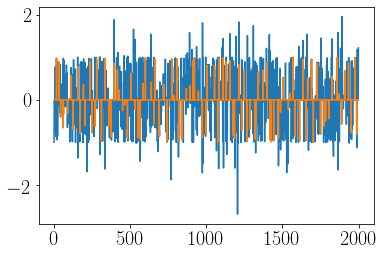

In [10]:
plot(mex_dol)
plot(PES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

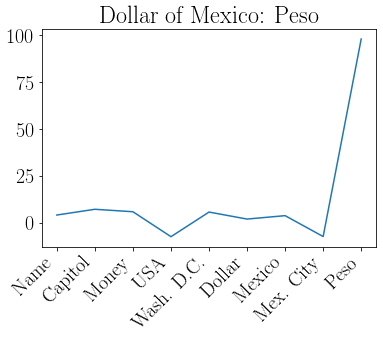

In [11]:
readout = np.real(np.dot(codebook, np.conj(mex_dol)))
plot(readout)
title('Dollar of Mexico: '+ labels[np.argmax(readout)])

ax = gca()
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.xticks(rotation=45, ha='right')
